# 필요 패키지 import

In [1]:
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings(action='ignore')

import pandas as pd
import numpy as np
 
import sklearn 
from sklearn.model_selection import StratifiedKFold , KFold
from sklearn.metrics import f1_score 
from catboost import Pool,CatBoostClassifier

from typing import List ,Dict, Tuple

# 데이터 불러오기

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

code_d = pd.read_csv('data/속성_D_코드.csv')
code_h = pd.read_csv('data/속성_H_코드.csv')
code_l = pd.read_csv('data/속성_L_코드.csv')

In [3]:
train.shape, test.shape

((501951, 35), (46404, 34))

In [4]:
code_d.shape, code_h.shape, code_l.shape

((1114, 5), (294, 3), (2025, 5))

# 데이터 확인

In [5]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [6]:
train.person_prefer_f.value_counts()

1    501951
Name: person_prefer_f, dtype: int64

In [7]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


In [8]:
code_d.head()

,속성 D 코드,속성 D 세분류코드,속성 D 소분류코드,속성 D 중분류코드,속성 D 대분류코드
0,4,4,3,2,1
1,5,5,3,2,1
2,7,7,6,2,1
3,8,8,6,2,1
4,9,8,6,2,1


In [9]:
code_h.head()

,속성 H 코드,속성 H 중분류코드,속성 H 대분류코드
0,2,315,1
1,4,316,3
2,5,317,3
3,6,318,3
4,7,319,3


In [10]:
code_l.head()

,속성 L 코드,속성 L 세분류코드,속성 L 소분류코드,속성 L 중분류코드,속성 L 대분류코드
0,1,1,1,1,2004
1,2,2,2,1,2004
2,3,3,2,1,2004
3,4,3,2,1,2004
4,5,5,2,1,2004


In [11]:
code_d.columns= ["attribute_d","attribute_d_d","attribute_d_s","attribute_d_m","attribute_d_l"]
code_h.columns= ["attribute_h","attribute_h_m", "attribute_h_l"]
code_l.columns= ["attribute_l","attribute_l_d","attribute_l_s","attribute_l_m","attribute_l_l"]

# Feature Engineering

In [12]:
# # 논리형 컬럼 -> 수치형
# for column in train.select_dtypes(include='bool').columns:
#     train[column] = train[column].astype(int)
    
# for column in test.select_dtypes(include='bool').columns:
#     test[column] = test[column].astype(int)

In [13]:
def merge_codes(df:pd.DataFrame,df_code:pd.DataFrame,col:str)->pd.DataFrame:
    df = df.copy()
    df_code = df_code.copy()
    df_code = df_code.add_prefix(f"{col}_")
    df_code.columns.values[0] = col
    return pd.merge(df,df_code,how="left",on=col)

In [14]:
# 날짜 컬럼 -> datetime형
train['contents_open_dt'] = pd.to_datetime(train['contents_open_dt'])
test['contents_open_dt'] = pd.to_datetime(test['contents_open_dt'])

In [15]:
# 월, 일, 시간, 요일
#train['month'] = pd.DatetimeIndex(train['contents_open_dt']).month
train['day'] = pd.DatetimeIndex(train['contents_open_dt']).day
train['hour'] = pd.DatetimeIndex(train['contents_open_dt']).hour
train['dayofweek'] = train['contents_open_dt'].dt.dayofweek

#test['month'] = pd.DatetimeIndex(test['contents_open_dt']).month
test['day'] = pd.DatetimeIndex(test['contents_open_dt']).day
test['hour'] = pd.DatetimeIndex(test['contents_open_dt']).hour
test['dayofweek'] = test['contents_open_dt'].dt.dayofweek

In [16]:
def c_j_m(x):
    if 1<=x<=10:
        return 1
    elif 11<=x<=20:
        return 2
    else:
        return 3

In [17]:
train['c_j_m']=train.day.apply(c_j_m)
test['c_j_m']=test.day.apply(c_j_m)

In [18]:
def sales_time(x):
    if 7<=x<=11:
        return 1
    elif 12<=x<=18:
        return 2
    elif 19<=x<=24:
        return 3
    else:
        return 4

In [19]:
train['sales_time']=train.hour.apply(sales_time)
test['sales_time']=test.hour.apply(sales_time)

In [20]:
def week(x):
    if x < 5 :
        return 0
    else:
        return 1
    
    

In [21]:
train['weekend']=train.dayofweek.apply(week)
test['weekend']=test.dayofweek.apply(week)


In [22]:
train['count_1']=(train.person_attribute_a==1).astype('int')
test['count_1']=(test.person_attribute_a==1).astype('int')

In [23]:
train['count_2']=((train.person_attribute_a_1==4) & (train.person_attribute_b==0)).astype('int')
test['count_2']=((test.person_attribute_a_1==4) & (test.person_attribute_b==0)).astype('int')

In [24]:
train['count_3']=((train.person_prefer_c==3) & (train.person_attribute_b==0)).astype('int')
test['count_3']=((test.person_prefer_c==3) & (test.person_attribute_b==0)).astype('int')

In [25]:
train['count_4']=(train.person_prefer_e==10).astype('int')
test['count_4']=(test.person_prefer_e==10).astype('int')

In [26]:
train['count_5']=((train.person_attribute_a==2) & (train.person_prefer_e==8)).astype('int')
test['count_5']=((test.person_attribute_a==2) & (test.person_prefer_e==8)).astype('int')

In [27]:
train['count_6']=((train.person_attribute_b==0) & (train.person_attribute_a==1)&(train.contents_attribute_i==2)).astype('int')
test['count_6']=((test.person_attribute_b==0) & (test.person_attribute_a==1)&(test.contents_attribute_i==2)).astype('int')

In [28]:
train['count_7']=((train.person_attribute_a==1) & (train.person_attribute_b==5)).astype('int')
test['count_7']=((test.person_attribute_a==1) & (test.person_attribute_b==5)).astype('int')

In [29]:
train['count_8']=(train.person_attribute_a_1==7).astype('int')
test['count_8']=(test.person_attribute_a_1==7).astype('int')

In [30]:
train['count_9']=(train.person_attribute_b==5).astype('int')
test['count_9']=(test.person_attribute_b==5).astype('int')

In [31]:
train['count_10']=((train.person_attribute_a==2) & (train.person_attribute_b==5)).astype('int')
test['count_10']=((test.person_attribute_a==2) & (test.person_attribute_b==5)).astype('int')

In [32]:
train['count_11']=(train.contents_attribute_j ==1).astype('int')
test['count_11']=(test.contents_attribute_j ==1).astype('int')

In [33]:
train['count_12']=(train.contents_attribute_j_1 ==1).astype('int')
test['count_12']=(test.contents_attribute_j_1 ==1).astype('int')

In [34]:
train['count_13']=((train.person_attribute_b ==1) & (train.contents_attribute_j_1 ==1)).astype('int')
test['count_13']=((test.person_attribute_b ==1) & (test.contents_attribute_j_1 ==1)).astype('int')

In [35]:
train['count_14']=(train.contents_attribute_k  ==2).astype('int')
test['count_14']=(test.contents_attribute_k  ==2).astype('int')

In [36]:
train['count_15']=(train.contents_attribute_i  ==2).astype('int')
test['count_15']=(test.contents_attribute_i  ==2).astype('int')

In [37]:
train['count_16']=((train.person_attribute_b==0) & (train.person_attribute_a==1)&(train.contents_attribute_e==7)).astype('int')
test['count_16']=((test.person_attribute_b==0) & (test.person_attribute_a==1)&(test.contents_attribute_e==7)).astype('int')

In [38]:
train['count_17']=((train.person_attribute_b==0) & (train.person_attribute_a==2)&(train.contents_attribute_e==6)).astype('int')
test['count_17']=((test.person_attribute_b==0) & (test.person_attribute_a==2)&(test.contents_attribute_e==6)).astype('int')

In [39]:
train['count_18']=((train.person_attribute_b==5) & (train.person_attribute_a==2)&(train.contents_attribute_e==11)).astype('int')
test['count_18']=((test.person_attribute_b==5) & (test.person_attribute_a==2)&(test.contents_attribute_e==11)).astype('int')

In [40]:
train['all_count']=train.iloc[:,41:].sum(axis=1)
test['all_count']=test.iloc[:,40:].sum(axis=1)

In [41]:
def preprocess_data(
                    df:pd.DataFrame,is_train:bool = True, cols_merge:List[Tuple[str,pd.DataFrame]] = []  , cols_equi:List[Tuple[str,str]]= [] ,
                    cols_drop:List[str] = ["id","person_prefer_f","person_prefer_g" ,"contents_open_dt"]
                    )->Tuple[pd.DataFrame,np.ndarray]:
    df = df.copy()

    y_data = None
    if is_train:
        y_data = df["target"].to_numpy()
        df = df.drop(columns="target")

    for col, df_code in cols_merge:
        df = merge_codes(df,df_code,col)

    cols = df.select_dtypes(bool).columns.tolist()
    df[cols] = df[cols].astype(int)

    for col1, col2 in cols_equi:
        df[f"{col1}_{col2}"] = (df[col1] == df[col2] ).astype(int)

    df = df.drop(columns=cols_drop)
    return (df , y_data)

In [42]:
# 소분류 중분류 대분류 속성코드 merge 컬럼명 및 데이터 프레임 리스트
cols_merge = [
              ("person_prefer_d_1" , code_d),
              ("person_prefer_d_2" , code_d),
              ("person_prefer_d_3" , code_d),
              ("contents_attribute_d" , code_d),
              ("person_prefer_h_1" , code_h),
              ("person_prefer_h_2" , code_h),
              ("person_prefer_h_3" , code_h),
              ("contents_attribute_h" , code_h),
              ("contents_attribute_l" , code_l),
]

# 회원 속성과 콘텐츠 속성의 동일한 코드 여부에 대한 컬럼명 리스트
cols_equi = [

    ("contents_attribute_c","person_prefer_c"),
    ("contents_attribute_e","person_prefer_e"),

    ("person_prefer_d_2_attribute_d_s" , "contents_attribute_d_attribute_d_s"),
    ("person_prefer_d_2_attribute_d_m" , "contents_attribute_d_attribute_d_m"),
    ("person_prefer_d_2_attribute_d_l" , "contents_attribute_d_attribute_d_l"),
    ("person_prefer_d_3_attribute_d_s" , "contents_attribute_d_attribute_d_s"),
    ("person_prefer_d_3_attribute_d_m" , "contents_attribute_d_attribute_d_m"),
    ("person_prefer_d_3_attribute_d_l" , "contents_attribute_d_attribute_d_l"),

    ("person_prefer_h_1_attribute_h_m" , "contents_attribute_h_attribute_h_m"),
    ("person_prefer_h_1_attribute_h_l" , "contents_attribute_h_attribute_h_l"),
    ("person_prefer_h_2_attribute_h_m" , "contents_attribute_h_attribute_h_m"),
    ("person_prefer_h_2_attribute_h_l" , "contents_attribute_h_attribute_h_l"),
    ("person_prefer_h_3_attribute_h_m" , "contents_attribute_h_attribute_h_m"),
    ("person_prefer_h_3_attribute_h_l" , "contents_attribute_h_attribute_h_l"),    
]

# 학습에 필요없는 컬럼 리스트
cols_drop = ["id","person_prefer_f","person_prefer_g" ,"contents_open_dt", "contents_rn",'dayofweek' ,'hour','day','person_rn']

In [43]:
x_train, y_train = preprocess_data(train, cols_merge = cols_merge, cols_equi= cols_equi, cols_drop = cols_drop)
x_test, _ = preprocess_data(test,is_train = False, cols_merge = cols_merge, cols_equi= cols_equi, cols_drop = cols_drop)
x_train.shape , y_train.shape , x_test.shape

((501951, 92), (501951,), (46404, 92))

In [94]:
x_person = train[['person_attribute_a', 'person_attribute_a_1', 'person_attribute_b',
       'person_prefer_c', 'person_prefer_d_1', 'person_prefer_d_2',
       'person_prefer_d_3', 'person_prefer_e', 'person_prefer_f',
       'person_prefer_g', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3']].iloc[:(np.shape(train)[0]), :]
x_contents = train[['contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h']].iloc[:(np.shape(train)[0]), :]

In [95]:
test_person = test[['person_attribute_a', 'person_attribute_a_1', 'person_attribute_b',
       'person_prefer_c', 'person_prefer_d_1', 'person_prefer_d_2',
       'person_prefer_d_3', 'person_prefer_e', 'person_prefer_f',
       'person_prefer_g', 'person_prefer_h_1', 'person_prefer_h_2',
       'person_prefer_h_3']]
test_contents = test[['contents_attribute_i', 'contents_attribute_a',
       'contents_attribute_j_1', 'contents_attribute_j',
       'contents_attribute_c', 'contents_attribute_k', 'contents_attribute_l',
       'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e',
       'contents_attribute_h']]

In [46]:
from yellowbrick.cluster import KElbowVisualizer

AttributeError: 'KMeans' object has no attribute 'k'

AttributeError: 'KMeans' object has no attribute 'k'

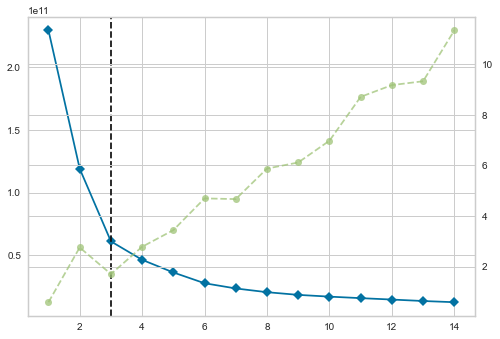

In [58]:
model=KMeans()
visualizer=KElbowVisualizer(model,k=(1,15))
visualizer.fit(x_contents)

In [96]:
# kmean feature
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42).fit(x_train)
x_train['cluster_all'] = kmeans.predict(x_train)
x_test['cluster_all'] = kmeans.predict(x_test)

In [97]:
# kmean feature
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42).fit(x_person)
x_train['cluster_person'] = kmeans.predict(x_person)
x_test['cluster_person'] = kmeans.predict(test_person)

In [98]:
# kmean feature
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7, random_state=42).fit(x_contents)
x_train['cluster_contents'] = kmeans.predict(x_contents)
x_test['cluster_contents'] = kmeans.predict(test_contents)

In [99]:
x_train['cluster_sum']= x_train['cluster_person'].astype(str).str.cat(x_train['cluster_contents'].astype(str), sep='-').str.cat(x_train['cluster_all'].astype(str), sep='-')
x_test['cluster_sum']= x_test['cluster_person'].astype(str).str.cat(x_test['cluster_contents'].astype(str), sep='-').str.cat(x_test['cluster_all'].astype(str), sep='-')

# new features

# 모델 학습

Catboost를 이용한 학습

In [50]:
#SHAP로 피쳐임포턴스 확인
import shap


X_importance = x_test

model = CatBoostClassifier(random_state=0).fit(x_train, y_train)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_importance)


#model = LGBMRegressor(random_state=0).fit(X_train_scaled, y)
#explainer = shap.TreeExplainer(model)
#shap_values = explainer.shap_values(X_importance)

# Plot summary_plot
shap.summary_plot(shap_values, X_importance)
# Plot summary_plot as barplot
shap.summary_plot(shap_values, X_importance, plot_type='bar')

#shap_sum = np.abs(shap_values).mean(axis=0)
#importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
#importance_df.columns = ['column_name', 'shap_importance']
#importance_df = importance_df.sort_values('shap_importance', ascending=False)
#importance_df

CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=95]="4-1-5": Cannot convert 'b'4-1-5'' to float

In [44]:
cat_features = x_train.columns[x_train.nunique() > 2].tolist()
print(cat_features)
print(len(cat_features))

['person_attribute_a_1', 'person_attribute_b', 'person_prefer_c', 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3', 'person_prefer_e', 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 'contents_attribute_i', 'contents_attribute_a', 'contents_attribute_j_1', 'contents_attribute_c', 'contents_attribute_l', 'contents_attribute_d', 'contents_attribute_m', 'contents_attribute_e', 'contents_attribute_h', 'c_j_m', 'sales_time', 'all_count', 'person_prefer_d_1_attribute_d_d', 'person_prefer_d_1_attribute_d_s', 'person_prefer_d_1_attribute_d_m', 'person_prefer_d_1_attribute_d_l', 'person_prefer_d_2_attribute_d_d', 'person_prefer_d_2_attribute_d_s', 'person_prefer_d_2_attribute_d_m', 'person_prefer_d_2_attribute_d_l', 'person_prefer_d_3_attribute_d_d', 'person_prefer_d_3_attribute_d_s', 'person_prefer_d_3_attribute_d_m', 'person_prefer_d_3_attribute_d_l', 'contents_attribute_d_attribute_d_d', 'contents_attribute_d_attribute_d_s', 'contents_attribute_d_attribute_d_m', '

In [45]:
SEED = 42
is_holdout = False
n_splits = 5
iterations = 3000
patience = 50

cv = KFold(n_splits=n_splits, shuffle=True, random_state=SEED)

In [46]:
scores = []
models = []


models = []
for tri, vai in cv.split(x_train):
    print("="*50)
    preds = []

    model = CatBoostClassifier(random_state=SEED, eval_metric="F1",cat_features=cat_features, one_hot_max_size=4)
    model.fit(x_train.iloc[tri], y_train[tri], 
            eval_set=[(x_train.iloc[vai], y_train[vai])], 
            early_stopping_rounds=patience ,
            verbose = 100
        )
    
    models.append(model)
    scores.append(model.get_best_score()["validation"]["F1"])
    if is_holdout:
        break   

Learning rate set to 0.139327
0:	learn: 0.6141220	test: 0.6164901	best: 0.6164901 (0)	total: 1.25s	remaining: 20m 52s
100:	learn: 0.6618003	test: 0.6867714	best: 0.6867714 (100)	total: 2m 24s	remaining: 21m 24s
200:	learn: 0.6683551	test: 0.6907643	best: 0.6907643 (200)	total: 4m 57s	remaining: 19m 42s
300:	learn: 0.6732440	test: 0.6941980	best: 0.6941980 (300)	total: 7m 51s	remaining: 18m 14s
400:	learn: 0.6759343	test: 0.6950954	best: 0.6952589 (395)	total: 11m 31s	remaining: 17m 12s
500:	learn: 0.6780472	test: 0.6953559	best: 0.6957156 (469)	total: 15m 28s	remaining: 15m 24s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 0.6957156221
bestIteration = 469

Shrink model to first 470 iterations.
Learning rate set to 0.139327
0:	learn: 0.6404189	test: 0.6387380	best: 0.6387380 (0)	total: 1.25s	remaining: 20m 54s
100:	learn: 0.6632009	test: 0.6857260	best: 0.6859458 (99)	total: 3m 43s	remaining: 33m 11s
200:	learn: 0.6694029	test: 0.6909047	best: 0.6911687 (191)	total: 

In [215]:
# scores = []
# models = []


# models = []
# for tri, vai in cv.split(x_train):
#     print("="*50)
#     preds = []

#     model = CatBoostClassifier(iterations=iterations,random_state=SEED,eval_metric="F1",cat_features=cat_features,one_hot_max_size=4)
#     model.fit(x_train.iloc[tri], y_train[tri], 
#             eval_set=[(x_train.iloc[vai], y_train[vai])], 
#             early_stopping_rounds=patience ,
#             verbose = 100
#         )
    
#     models.append(model)
#     scores.append(model.get_best_score()["validation"]["F1"])
#     if is_holdout:
#         break    

In [103]:
print(scores)
print(np.mean(scores))

[0.6936035088046039, 0.6938458805822248, 0.6898619254775865, 0.6925240894604523, 0.6897853884693038]
0.6919241585588343


# threshold 0.4

In [47]:
threshold = 0.37

In [48]:
pred_list = []
scores = []
for i,(tri, vai) in enumerate( cv.split(x_train) ):
    pred = models[i].predict_proba(x_train.iloc[vai])[:, 1]
    pred = np.where(pred >= threshold , 1, 0)
    score = f1_score(y_train[vai],pred)
    scores.append(score)
    pred = models[i].predict_proba(x_test)[:, 1]
    pred_list.append(pred)
print(scores)
print(np.mean(scores))

[0.717779079153543, 0.7155508156574634, 0.7163861035790678, 0.7153840683350058, 0.7133908278095872]
0.7156981789069334


In [50]:
pred = np.mean( pred_list , axis = 0 )

In [51]:
pred

array([0.40667172, 0.25504268, 0.35493405, ..., 0.66132097, 0.70065365,
       0.68528316])

In [ ]:
35 -> 71507

In [ ]:
36 -> 71567

In [ ]:
0.37->715698

In [ ]:
0.38-> 7156182

In [ ]:
7156

In [127]:
pred = np.mean( pred_list , axis = 0 )
pred = np.where(pred >= threshold , 1, 0)

# 제출파일 생성

In [52]:
submission = pd.read_csv('data/sample_submission.csv')
submission['target'] = pred
submission

,id,target
0,0,0.406672
1,1,0.255043
2,2,0.354934
3,3,0.279915
4,4,0.340143
...,...,...
46399,46399,0.556254
46400,46400,0.493479
46401,46401,0.661321
46402,46402,0.700654


In [53]:
submission.to_csv('0128_cat_threshold_0.37proba.csv', index=False)

In [61]:
zoo=pd.read_csv('0128_cat_threshold_0.37proba.csv')

In [62]:
sae=pd.read_csv('20211222_1st.csv')

In [129]:
threshold = 0.37

In [130]:
pred=(zoo.target+sae.target)/2

In [131]:
pred = np.where(pred >= threshold , 1, 0)

In [132]:
submission = pd.read_csv('data/sample_submission.csv')
submission['target'] = pred
submission

,id,target
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1
...,...,...
46399,46399,1
46400,46400,1
46401,46401,1
46402,46402,1


In [133]:
submission.to_csv('last.csv', index=False)

In [ ]:
pred = np.where(t >= threshold , 1, 0)

In [68]:
kyu=pd.read_csv('0128_cat_threshold_0.37221proba.csv')

In [134]:
submission.target.value_counts()

1    36925
0     9479
Name: target, dtype: int64